# Lab 4: Data Visualization and EDA

Objectives:
- To gain practice in creating various data visualizations
- To encourage students to perform EDA on the required dataset

***

1. Load all Superstore datasets.

*Note: The same dataset used in Lab 3*

In [1]:
# Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

dfOrder =  pd.read_csv("../week3/Superstore/superstore_order.csv")
dfPeople =  pd.read_csv("../week3/Superstore/superstore_people.csv")
dfReturn =  pd.read_csv("../week3/Superstore/superstore_return.csv")

2. Determine shape of each dataset (print out the results as well).

In [21]:
# Write your code here

print(dfOrder.shape)
print(dfPeople.shape)
print(dfReturn.shape)


(8880, 21)
(4, 2)
(296, 2)


3. Show information of the dataset.


In [25]:
# Write your code here (3.1)
print(dfOrder.isnull().any())
print(dfPeople.isnull().any())
print(dfReturn.isnull().any())

Row ID           False
Order ID         False
Order Date       False
Ship Date        False
Ship Mode        False
Customer ID      False
Customer Name    False
Segment          False
Country          False
City             False
State            False
Postal Code      False
Region           False
Product ID       False
Category         False
Sub-Category     False
Product Name     False
Sales            False
Quantity         False
Discount         False
Profit           False
dtype: bool
Person    False
Region    False
dtype: bool
Returned    False
Order ID    False
dtype: bool


4. Are there any missing values? If so, in which column?

Ans: No missing values.

5. 
- 5.1 List unique segments
- 5.2 List unique segments and their corresponding count
- 5.3 Create a pie chart to demonstrate unique segments and their count
- 5.4 Briefly describe what could be interpreted from this pie chart

*Note: please create additional cells to answer 5.2 - 5.3*

In [26]:
# Write your code here (5.1)
dfOrder["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [27]:
# 5.2
dfOrder["Segment"].value_counts()

Segment
Consumer       4613
Corporate      2673
Home Office    1594
Name: count, dtype: int64

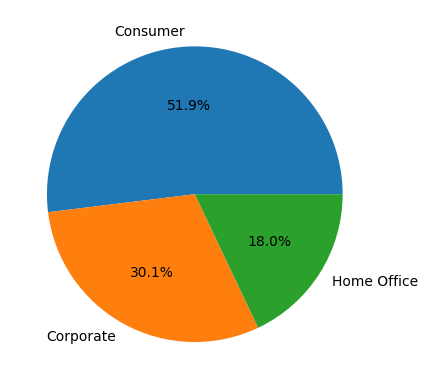

In [32]:
# 5.3
data = dfOrder["Segment"].value_counts()

plt.pie(data.values, labels=data.index, autopct='%1.1f%%')
plt.show()


Answer for the question 5.4

Ans: Count all the possible data that in the column `Segment` from superstore_order and display the data in the piechart and show the percentage of each outcome into a percentage.

6. 
- 6.1 List unique states
- 6.2 List top-10 unique states and their corresponding count
- 6.3 Create a bar chart (vertical) to demonstrate the count of top-10 unique states
- 6.4 Based on 6.2, also include the total sales of these states (show your result as a dataframe)
- 6.5 Using the result from 6.4, if you were the owner of this superstore, what information could be interpreted from this result?

*Note: please create additional cells to answer 6.2 - 6.4*

In [34]:
# Write your code here (6.1)
dfOrder["State"].unique()


array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [39]:
# 6.2
dfOrder["State"].value_counts().iloc[:10]

State
California        1754
New York          1001
Texas              860
Pennsylvania       531
Washington         452
Illinois           427
Ohio               396
Florida            339
Michigan           230
North Carolina     229
Name: count, dtype: int64

Text(0.5, 1.0, 'test')

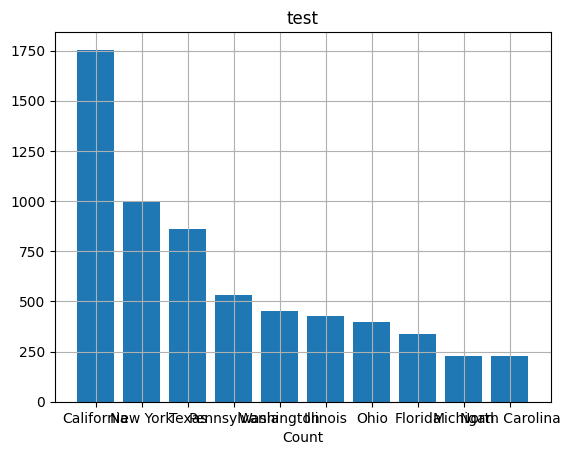

In [46]:
# 6.3
data = dfOrder["State"].value_counts().head(10)
plt.bar(data.index, data.values)
plt.xlabel("State")
plt.xlabel("Count")
plt.grid()
plt.title("test")

In [71]:
#6.4 Based on 6.2, also include the total sales of these states (show your result as a dataframe)

state = dfOrder["State"].value_counts().head(10)

sales = dfOrder.groupby("State")["Sales"].sum().loc[state.index]

pd.DataFrame({"State": state, "Sales": sales})


,State,Sales
State,,
California,1754,399195.4555
New York,1001,274866.8190
Texas,860,147855.0282
Pennsylvania,531,103852.5210
Washington,452,124497.7780
Illinois,427,71456.1780
Ohio,396,67924.2140
Florida,339,84083.0880
Michigan,230,62147.6960


Answer for the question 6.5

Ans: The result from the previous section is to count all of the `State` from superstore orders and then sum all of the sales in each state

7. 
- 7.1 List unique categories
- 7.2 Create a bar chart (horizontal) to demonstrate the proportion of these categories
- 7.3 Compute the ratio of these categories in percentage and print the results

*Note: please create additional cells to answer 7.2 - 7.3*

In [72]:
# Write your code here (7.1)
dfOrder["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

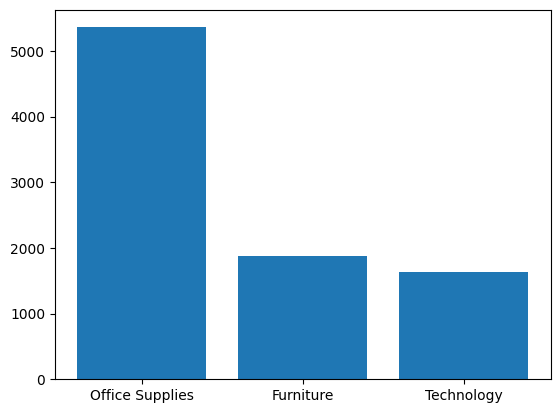

In [76]:
# 7.2
data = dfOrder["Category"].value_counts()
plt.bar(data.index, data.values)
plt.show()

8. Update the type of all columns that contain dates to *datetime* and show information after an update.

In [13]:
# write your code here


9. Create a new column "Processing time day" to show number of days taken to ship an order and show your result in a dataframe format.

*Hint: The duration starts as soon as the item has been ordered and ends once the order has successfully shipped.*

In [14]:
# write your code here


10. Based on the result in 9.
- 10.1 How many orders are there that take more than 5 days to process?
- 10.2 Show the top 5 rows (expected output should contain these columns: Order ID, Order Date, Ship Date, Processing time day, Quantity)
- 10.3 Plot the histogram based on the column Quantity

*Note: please create additional cells to answer 10.2 - 10.3*

In [15]:
# 10.1

In [16]:
# Write your code here (10.2)


In [17]:
# 10.3

[BONUS 20 pts] Determine the percentage of customers who: 
- B1)returned the product once
- B2) returned the product at least once
- B3) never returned the product
- Finally, Plot a comparison of B2 and B3

*Note: please create additional cells to answer the above points*

In [102]:
returnOne = dfOrder.merge(dfReturn[dfReturn["Returned"] == "Yes"], how="inner", on="Order ID")["Customer ID"].drop_duplicates(keep=False).count()
returnOne
allCustomer = dfOrder["Customer ID"].drop_duplicates().count()
# # returnOne
print((returnOne/allCustomer)*100)

7.858048162230672


In [103]:
returnOne = dfOrder.merge(dfReturn[dfReturn["Returned"] == "Yes"], how="inner", on="Order ID")["Customer ID"].drop_duplicates().count()
returnOne
allCustomer = dfOrder["Customer ID"].drop_duplicates().count()
# # returnOne
print((returnOne/allCustomer)*100)

28.13688212927757


In [18]:
# 6.3
